## Ejercicio 2

Trabajar con el dataset de Diabetes

In [4]:
# Imports
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Cargamos el dataset i leemos su descripción

In [2]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print(diabetes.keys()) # Para saber que obtenemos al descargar el conjunto de datos

print(diabetes.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, po

Vamos a realizar un :

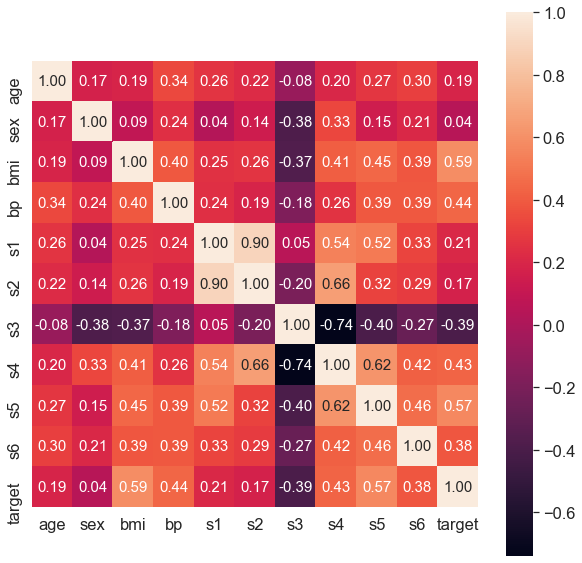

In [5]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df[df.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15}, yticklabels=df.columns, xticklabels=df.columns)
plt.show();

**Ejercicio**
- Realiza una regresión Lasso con todas las características. Debes seleccionar el mejor valor para el hiperparàmetro _alpha_ en el rango $10^{-6}$, 100.

- Muestra por pantalla el mejor _alpha_ i el mejor _score_

- Realiza un plot donde muestres los residuos (la diferencia entre los valores reales y la predicción) frente a los valores predichos. Como es esta distribución?

In [6]:
from sklearn.linear_model import Lasso

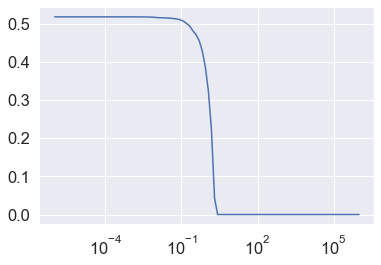

In [14]:
X = diabetes.data
y = diabetes.target

#alphas = np.linspace(10**-6, 100, 100)

#for a in alphas:
    #lasso = Lasso(alpha= a)
    
alphas = np.logspace(-6, 6, 100)

scores = []
best = (0,0)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y);
    sc = lasso.score(X,y)
    scores.append(sc)
    if sc > best[0]:
        best = sc, alpha
    
plt.plot(alphas, scores)
plt.xscale("log")
plt.show()

In [15]:
lasso = Lasso(alpha=best[1]) #Usamos el mejor alpha
lasso.fit(X, y);
sc = lasso.score(X,y)
print(sc, best[1])

0.5177494253788464 1e-06


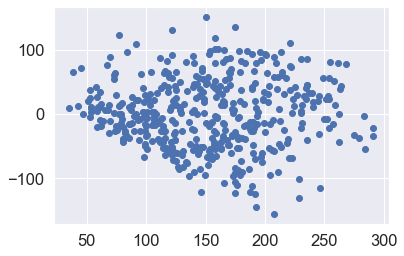

In [16]:
y_predict = lasso.predict(X)

plt.scatter(y_predict, y-y_predict); #Representación de los residuos, ha de ser uniforme, 
#no se da en la esquina inferior izquierda.

In [12]:
alphas = np.linspace(0, 6, 100)
alphas

array([0.        , 0.06060606, 0.12121212, 0.18181818, 0.24242424,
       0.3030303 , 0.36363636, 0.42424242, 0.48484848, 0.54545455,
       0.60606061, 0.66666667, 0.72727273, 0.78787879, 0.84848485,
       0.90909091, 0.96969697, 1.03030303, 1.09090909, 1.15151515,
       1.21212121, 1.27272727, 1.33333333, 1.39393939, 1.45454545,
       1.51515152, 1.57575758, 1.63636364, 1.6969697 , 1.75757576,
       1.81818182, 1.87878788, 1.93939394, 2.        , 2.06060606,
       2.12121212, 2.18181818, 2.24242424, 2.3030303 , 2.36363636,
       2.42424242, 2.48484848, 2.54545455, 2.60606061, 2.66666667,
       2.72727273, 2.78787879, 2.84848485, 2.90909091, 2.96969697,
       3.03030303, 3.09090909, 3.15151515, 3.21212121, 3.27272727,
       3.33333333, 3.39393939, 3.45454545, 3.51515152, 3.57575758,
       3.63636364, 3.6969697 , 3.75757576, 3.81818182, 3.87878788,
       3.93939394, 4.        , 4.06060606, 4.12121212, 4.18181818,
       4.24242424, 4.3030303 , 4.36363636, 4.42424242, 4.48484

**Ejercicio 2**

Vamos a hacer una segunda versión sobre este ejercicio usando una Regresión polinómica:

- Crea un polinomio de grado 1 y compara el resultado con el obtenido con la regressión LASSO. Que sucede?
- Crea polinómios de grados mayores, que sucede con el _score_ ?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

**Ejercicio 3**

Evidentemente parece que lo que estamos consiguiendo es realizar overfitting sobre el conjunto de datos. Los dividimos en dos conjuntos usando la función  `train_test_split` y de esta manera obtendremos un conjunto de test. Ver documentación [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split)

Trabajaremos con una métrica diferente: MSE [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean%20squared%20error#sklearn.metrics.mean_squared_error)

- Dividir el conjunto de datos y los valores objetivo en 2 conjuntos. Nos quedaremos el 70% para entrenamiento.
- Probar regresiones polinómicas con diferentes grados. Nos quedaremos con la que tenga mejor MSE en el conjunto de test. 
- Realiza un plot donde se vea la evolución del MSE en el conjunto de test.
- Añade el MSE del conjunto de entrenamiento. Que podemos observar?

_Nota:_ Intenta automatizar el proceso realizando un bucle sobre el grado del polinómio



In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error